In [1]:
import pandas as pd
import requests
import json

/tmp/ipykernel_11923/3527380040.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [ ]:
seriesID = ['LASST010000000000003', 'LASST020000000000003',
            'LASST040000000000003', 'LASST050000000000003',
            'LASST060000000000003', 'LASST080000000000003',
            'LASST090000000000003', 'LASST100000000000003',
            'LASST120000000000003', 'LASST130000000000003',
            'LASST150000000000003', 'LASST160000000000003',
            'LASST170000000000003', 'LASST180000000000003',
            'LASST190000000000003', 'LASST200000000000003',
            'LASST210000000000003', 'LASST220000000000003',
            'LASST230000000000003', 'LASST240000000000003',
            'LASST250000000000003', 'LASST260000000000003',
            'LASST270000000000003', 'LASST280000000000003',
            'LASST290000000000003', 'LASST300000000000003',
            'LASST310000000000003', 'LASST320000000000003',
            'LASST330000000000003', 'LASST340000000000003',
            'LASST350000000000003', 'LASST360000000000003',
            'LASST370000000000003', 'LASST380000000000003',
            'LASST390000000000003', 'LASST400000000000003',
            'LASST410000000000003', 'LASST420000000000003',
            'LASST440000000000003', 'LASST450000000000003',
            'LASST460000000000003', 'LASST470000000000003',
            'LASST480000000000003', 'LASST490000000000003',
            'LASST500000000000003', 'LASST510000000000003',
            'LASST530000000000003', 'LASST540000000000003',
            'LASST550000000000003', 'LASST560000000000003']

In [ ]:
headers = {'Content-type': 'application/json'}
data = json.dumps({"seriesid": seriesID,"startyear":"1980", "endyear":"2023"})
p = requests.post('https://api.bls.gov/publicAPI/v2/timeseries/data/', data=data, headers=headers)
json_data = json.loads(p.text)

# this only allows 10yr data at once...

In [2]:
# read data (using Downloaded data)
df_data = pd.read_csv("data/stateUER.csv")
df_state = pd.read_csv("data/statesConversion.csv", dtype=str)

In [3]:
df_series = df_data.pivot(index="Label", columns="Series ID", values="Value")
# Drop Puerto and Seasonal adjusted Calfonia
df_series = df_series.drop(['LASST720000000000003','LAUST060000000000003'], axis=1)
df_series.columns = df_series.columns.str[5:7]

In [4]:
# rename Series ID to state name
state_code_to_name = dict(zip(df_state["state_code"], df_state["state_name"]))
df_series.columns = [state_code_to_name.get(col, col) for col in df_series.columns]
df_series = df_series.apply(pd.to_numeric)
df_series.index = pd.to_datetime(df_series.index)

/tmp/ipykernel_11923/174697077.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_series.index = pd.to_datetime(df_series.index)


In [ ]:
# export to excel
df_series.sort_index().to_excel("data/cleanStateUER.xlsx")

<Axes: xlabel='Label'>

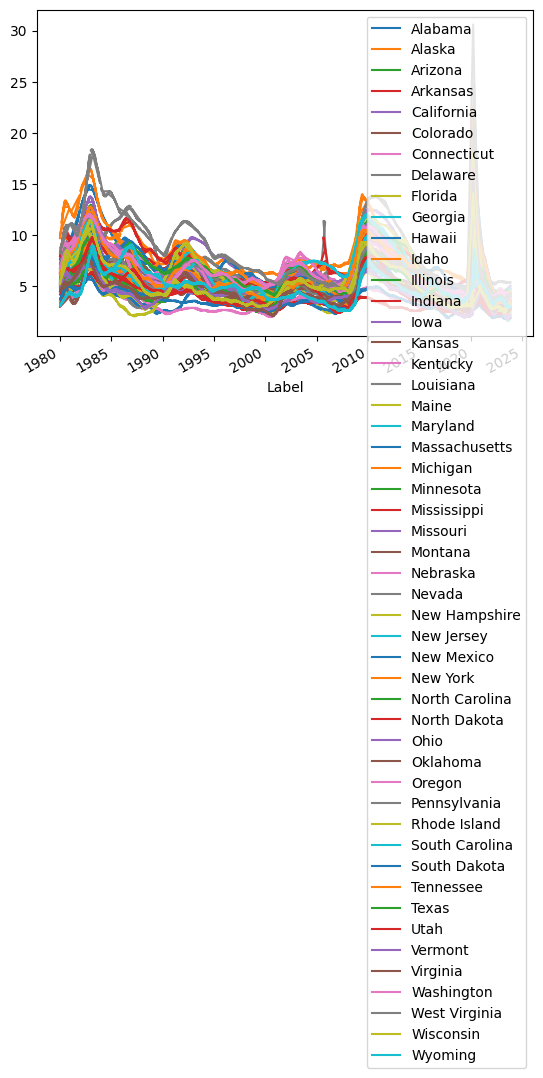

In [7]:
df_series.plot()

In [ ]:
df_data